VIZOSO, María Alejandra - DNI: 160837708 - mavizoso@gmail.com
DATA ANALYTICS CON PYTHON - COMISION: 25262
Miércoles de 20 a 22 hs

1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.
*   En primer lugar voy a montar mi google drive
*   A continuación voy a importar los datasets como dataframe

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df_ventas = pd.read_csv('/content/drive/MyDrive/datasets/ventas.csv', encoding='utf-8')
df_clientes = pd.read_csv('/content/drive/MyDrive/datasets/clientes.csv', encoding='utf-8')
df_marketing = pd.read_csv('/content/drive/MyDrive/datasets/marketing.csv', encoding='utf-8')

4. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.

In [3]:
print("*** Información completa de Ventas ***")
df_ventas.info(verbose=True)
duplicados_ventas = df_ventas.duplicated(keep='first').sum()
print(f"\nCantidad de filas completas duplicadas conservando la primera de ellas: {duplicados_ventas}")
print()
print("*** Información completa de Clientes ***")
df_clientes.info(verbose=True)
duplicados_clientes = df_clientes.duplicated(keep='first').sum()
print(f"\nCantidad de filas completas duplicadas conservando la primera de ellas: {duplicados_clientes}")
print()
print("*** Información completa de Marketing ***")
df_marketing.info(verbose=True)
duplicados_marketing = df_marketing.duplicated(keep='first').sum()
print(f"\nCantidad de filas completas duplicadas conservando la primera de ellas: {duplicados_marketing}")


*** Información completa de Ventas ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB

Cantidad de filas completas duplicadas conservando la primera de ellas: 35

*** Información completa de Clientes ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-nul

5. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.

In [4]:
print("*** Detalle de filas NAN en Ventas ***")
filas_con_nan = df_ventas.isna().any(axis=1)
print(df_ventas.loc[filas_con_nan])
print("*** Detalle de filas nulas en Ventas ***")
filas_nulas = df_ventas.isnull().any(axis=1)
print(df_ventas.loc[filas_nulas])
print()
print("*** Detalle de filas NAN en Clientes ***")
filas_con_nan = df_clientes.isna().any(axis=1)
print(df_clientes.loc[filas_con_nan])
print("*** Detalle de filas nulas en Clientes ***")
filas_nulas = df_clientes.isnull().any(axis=1)
print(df_clientes.loc[filas_nulas])
print()
print("*** Detalle de filas NAN en Marketing ***")
filas_con_nan = df_marketing.isna().any(axis=1)
print(df_marketing.loc[filas_con_nan])
print("*** Detalle de filas nulas en Marketing ***")
filas_nulas = df_marketing.isnull().any(axis=1)
print(df_marketing.loc[filas_nulas])

*** Detalle de filas NAN en Ventas ***
     id_venta               producto precio  cantidad fecha_venta    categoria
136       627  Elementos de cerámica    NaN       NaN  17/01/2024   Decoración
139      2171    Parlantes Bluetooth    NaN       NaN  17/01/2024  Electrónica
*** Detalle de filas nulas en Ventas ***
     id_venta               producto precio  cantidad fecha_venta    categoria
136       627  Elementos de cerámica    NaN       NaN  17/01/2024   Decoración
139      2171    Parlantes Bluetooth    NaN       NaN  17/01/2024  Electrónica

*** Detalle de filas NAN en Clientes ***
Empty DataFrame
Columns: [id_cliente, nombre, edad, ciudad, ingresos]
Index: []
*** Detalle de filas nulas en Clientes ***
Empty DataFrame
Columns: [id_cliente, nombre, edad, ciudad, ingresos]
Index: []

*** Detalle de filas NAN en Marketing ***
Empty DataFrame
Columns: [id_campanha, producto, canal, costo, fecha_inicio, fecha_fin]
Index: []
*** Detalle de filas nulas en Marketing ***
Empty DataFrame


1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.


*   Con el fin de poder trabajar, en primer lugar voy a eliminar nulos y duplicados en el único df que los presenta: df_ventas
*   Luego voy a adecuar los tipos de datos para poder trabajar adecuadamente con las columnas que los contienen. En df_ventas es necesario eliminar el signo $ de la columna precio para poder tomarla como float y convertir fecha_venta al formato date. En df_marketing es necesario convertir a fecha fecha_inicio y fecha_fin.



In [5]:
df_ventas.dropna() #elimino las dos filas con na y me quedan 3033
df_ventasL = df_ventas.drop_duplicates().copy() #elimino las filas duplicadas conservando solo la última, ahora me quedan 3000

In [6]:
from datetime import datetime
df_ventasL['precio'].astype(str)
df_ventasL['precio'] = df_ventasL['precio'].str.replace('$', '')
df_ventasL['precio'] = df_ventasL['precio'].astype(float)
df_ventasL['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format='%d/%m/%Y')
print(df_ventasL.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [7]:
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], format='%d/%m/%Y')
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], format='%d/%m/%Y')
print(df_marketing.dtypes)

id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.
Para este punto y, dado los datos disponibles tomaré como definición de productos de alto rendimiento al 25% que obtuvieron un mayor nivel de ingresos (cantidad por precio) totales.

In [8]:
productos_df = df_ventasL[['producto', 'cantidad', 'precio']].copy()
productos_df.describe()
productos_df['valor'] = productos_df['cantidad'] * productos_df['precio']
df_totalP = productos_df.groupby('producto', as_index=False)['valor'].sum()
df_totalP = df_totalP.sort_values('valor', ascending=False)
df_totalP.describe()

,valor
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


In [9]:
percentil80 = df_totalP['valor'].quantile(0.8,interpolation='midpoint')
df_totalP_mv0 = df_totalP[df_totalP['valor'] > percentil80]
df_totalP_mv1 = df_totalP_mv0[['producto', 'valor']]
print("Subconjunto final con el 20% superior:")
print(df_totalP_mv1)

Subconjunto final con el 20% superior:
             producto     valor
19    Lámpara de mesa  82276.38
3         Auriculares  74175.58
20         Microondas  72562.89
5            Cafetera  59607.31
9   Cuadro decorativo  54297.60
27         Smartphone  54132.44


3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [10]:
categoria_df = df_ventasL[['categoria', 'cantidad', 'precio']].copy()
categoria_df['valor'] = categoria_df['cantidad'] * categoria_df['precio']
total3 = categoria_df['valor'].sum()
categoria_df.sort_values('categoria')

,categoria,cantidad,precio,valor
0,Decoración,5.0,69.94,349.70
2180,Decoración,7.0,45.05,315.35
935,Decoración,7.0,71.03,497.21
934,Decoración,7.0,107.80,754.60
2181,Decoración,11.0,111.41,1225.51
...,...,...,...,...
981,Electrónica,4.0,43.20,172.80
2129,Electrónica,6.0,32.05,192.30
2128,Electrónica,8.0,80.89,647.12
2126,Electrónica,6.0,116.35,698.10


In [11]:
df_totalC = categoria_df.groupby('categoria', as_index=False)['valor'].sum()
df_totalC = df_totalC.sort_values('valor',ascending=False)
df_totalC['porc'] = df_totalC['valor'] * 100 / total3
df_totalC.head(5)

,categoria,valor,porc
1,Electrodomésticos,505299.63,34.442224
2,Electrónica,482577.80,32.893459
0,Decoración,479216.09,32.664318


4. Integración de Datos: Combinar los sets de datos de ventas y marketing
para obtener una visión más amplia de las tendencias.

In [12]:
df_VM = pd.merge(df_ventasL, df_marketing, on = "producto", how = "outer")
total_filas_nulas = df_VM.isnull().any(axis=1).sum()
print(total_filas_nulas)

6


In [13]:
df_con_nulos = df_VM[df_VM.isna().any(axis=1)]
df_con_nulos.head(10)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,id_campanha,canal,costo,fecha_inicio,fecha_fin
3267,627,Elementos de cerámica,NaN,NaN,2024-01-17,Decoración,22,RRSS,5.44,2024-06-26,2024-07-15
3268,627,Elementos de cerámica,NaN,NaN,2024-01-17,Decoración,82,TV,5.69,2024-09-08,2024-10-12
3269,627,Elementos de cerámica,NaN,NaN,2024-01-17,Decoración,52,Email,5.74,2024-09-09,2024-09-30
6432,2171,Parlantes Bluetooth,NaN,NaN,2024-01-17,Electrónica,84,TV,4.42,2024-04-17,2024-05-05
6433,2171,Parlantes Bluetooth,NaN,NaN,2024-01-17,Electrónica,54,Email,2.95,2024-08-09,2024-09-22
6434,2171,Parlantes Bluetooth,NaN,NaN,2024-01-17,Electrónica,24,RRSS,6.00,2024-09-22,2024-10-26


Al integrar con outer obtengo como primera conclución que tengo dos productos que fueron objeto de campañas de marketing y que nunca se vendieron.

**ETAPA 3**
1- Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.

In [14]:
productos_dfA = productos_df.groupby('producto').agg({'cantidad': 'sum', 'precio': 'max', 'valor': 'sum'})
productos_dfA.reset_index(inplace=True)
productos_dfAO = productos_dfA.sort_values('valor', ascending=False)
productos_dfA.describe()

,cantidad,precio,valor
count,30.000000,30.000000,30.000000
mean,649.833333,123.967667,48903.117333
std,169.020522,1.232672,13265.561715
min,160.000000,119.300000,11128.800000
25%,623.750000,123.497500,45601.920000
50%,635.500000,124.415000,48140.245000
75%,672.000000,124.777500,51092.960000
max,1112.000000,124.970000,82276.380000


In [15]:
canti_min = productos_dfA['cantidad'].min()
canti_promedio = round(productos_dfA['cantidad'].mean(),2)
canti_mediana = productos_dfA['cantidad'].median()
canti_moda = productos_dfA['cantidad'].mode()
canti_max = productos_dfA['cantidad'].max()
canti_mad = (productos_dfA['cantidad'] - canti_promedio).abs().mean()
canti_desstd = round(productos_dfA['cantidad'].std(),2)
print("Medidas de tendencia central para la cantidad de productos vendidos:")
print(f"Cantidad mínima: {canti_min}")
print(f"Cantidad promedio: {canti_promedio}")
print(f"Cantidad mediana: {canti_mediana}")
print(f"Cantidad moda: {canti_moda[0]}")
print(f"Cantidad máxima: {canti_max}")
print("Medidas de desviación para la cantidad de productos vendidos:")
print(f"El rango para la cantidad es: {canti_max - canti_min}")
print(f"La desviación media absoluta para la cantidad es: {canti_mad}")
print(f"La desviación estandar para la cantidad es: {canti_desstd}")
print(f"El coeficiente de variación para la cantidad es: {round(canti_desstd / canti_promedio , 2) * 100}%")

Medidas de tendencia central para la cantidad de productos vendidos:
Cantidad mínima: 160.0
Cantidad promedio: 649.83
Cantidad mediana: 635.5
Cantidad moda: 632.0
Cantidad máxima: 1112.0
Medidas de desviación para la cantidad de productos vendidos:
El rango para la cantidad es: 952.0
La desviación media absoluta para la cantidad es: 93.54400000000001
La desviación estandar para la cantidad es: 169.02
El coeficiente de variación para la cantidad es: 26.0%


In [16]:
precio_min = productos_dfA['precio'].min()
precio_promedio = round(productos_dfA['precio'].mean(),2)
precio_mediana = productos_dfA['precio'].median()
precio_moda = productos_dfA['precio'].mode()
precio_max = productos_dfA['precio'].max()
precio_mad = (productos_dfA['precio'] - precio_promedio).abs().mean()
precio_desstd = round(productos_dfA['precio'].std(),2)
print("Medidas de tendencia central para el precio de productos vendidos:")
print(f"Precio mínimo: {precio_min}")
print(f"Precio promedio: {precio_promedio}")
print(f"Precio mediana: {precio_mediana}")
print(f"Precio moda: {precio_moda[0]}")
print(f"Precio máximo: {precio_max}")
print("Medidas de desviación para el precio de productos vendidos:")
print(f"El rango para el precio es: {precio_max - precio_min}")
print(f"La desviación media absoluta para el precio es: {round(precio_mad,2)}")
print(f"La desviación estandar para el precio es: {precio_desstd}")
print(f"El coeficiente de variación para el precio es: {round(precio_desstd / precio_promedio , 2) * 100}%")

Medidas de tendencia central para el precio de productos vendidos:
Precio mínimo: 119.3
Precio promedio: 123.97
Precio mediana: 124.41499999999999
Precio moda: 124.57
Precio máximo: 124.97
Medidas de desviación para el precio de productos vendidos:
El rango para el precio es: 5.670000000000002
La desviación media absoluta para el precio es: 0.9
La desviación estandar para el precio es: 1.23
El coeficiente de variación para el precio es: 1.0%


In [17]:
valor_min = productos_dfA['valor'].min()
valor_promedio = round(productos_dfA['valor'].mean(),2)
valor_mediana = productos_dfA['valor'].median()
valor_moda = productos_dfA['valor'].mode()
valor_max = productos_dfA['valor'].max()
valor_mad = (productos_dfA['valor'] - valor_promedio).abs().mean()
valor_desstd = round(productos_dfA['valor'].std(),2)
print("Medidas de tendencia central para el valor de las ventas:")
print(f"Valor mínimo: {valor_min}")
print(f"Valor promedio: {valor_promedio}")
print(f"Valor mediana: {valor_mediana}")
print(f"Valor moda: {valor_moda[0]}")
print(f"Valor máximo: {round(valor_max,2)}")
print("Medidas de desviación para el valor de las ventas:")
print(f"El rango para el valor es: {round(valor_max - valor_min,2)}")
print(f"La desviación media absoluta para el valor es: {round(valor_mad,2)}")
print(f"La desviación estandar para el valor es: {valor_desstd}")
print(f"El coeficiente de variación para el valor es: {round(valor_desstd / valor_promedio , 2) * 100}%")

Medidas de tendencia central para el valor de las ventas:
Valor mínimo: 11128.800000000001
Valor promedio: 48903.12
Valor mediana: 48140.244999999995
Valor moda: 11128.800000000001
Valor máximo: 82276.38
Medidas de desviación para el valor de las ventas:
El rango para el valor es: 71147.58
La desviación media absoluta para el valor es: 7746.13
La desviación estandar para el valor es: 13265.56
El coeficiente de variación para el valor es: 27.0%


Para crear el informe, voy a crear un dataframe con todos los valores que muestro como tabla formateada con styles

In [18]:
datos = [[canti_min,precio_min,valor_min],[canti_promedio,precio_promedio,valor_promedio],
         [canti_mediana,precio_mediana,valor_mediana],[canti_moda[0],precio_moda[0],valor_moda[0]],
         [canti_max,precio_max,valor_max],[canti_max-canti_min,precio_max-precio_min,valor_max-valor_min],
         [canti_mad,precio_mad,valor_mad],[canti_desstd,precio_desstd,valor_desstd],
         [100*canti_desstd/canti_promedio,100*precio_desstd/precio_promedio,100*valor_desstd/valor_promedio]]
danalis = ['Cantidad','Precio','Valor']
indice = ['Minimo','Promedio','Mediana','Moda','Maximo','Rango','Desviación Media Absoluta','Desvio Estandar','Coeficiente de Variación %']
df = pd.DataFrame(datos,index=indice,columns=danalis)

In [19]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: darkgrey; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #93291E; color: white; text-align: center; font-size: 14px; font-weight: bold; border: 1px solid black;"
}
properties = {"border": "1px solid black", "width": "100px", "height": "35px", "text-align": "center"}

df.style.format(precision=2).set_table_styles([cell_hover, index_names, headers]).set_properties(**properties)

,Cantidad,Precio,Valor
Minimo,160.00,119.30,11128.80
Promedio,649.83,123.97,48903.12
Mediana,635.50,124.41,48140.24
Moda,632.00,124.57,11128.80
Maximo,1112.00,124.97,82276.38
Rango,952.00,5.67,71147.58
Desviación Media Absoluta,93.54,0.90,7746.13
Desvio Estandar,169.02,1.23,13265.56
Coeficiente de Variación %,26.01,0.99,27.13


Como segundo componente de este informe coloco un grafico de barras creado con matplotlib que muestra los valores totales por producto para todos los productos, lo que en este caso es posible por tratarse solo de 30 productos.
Con el fin de mejorar la visualización este gráfico se encuentra ordenado por valores de mayor a menor. Resalto en él promedio y promedio mas menos desviación estandar

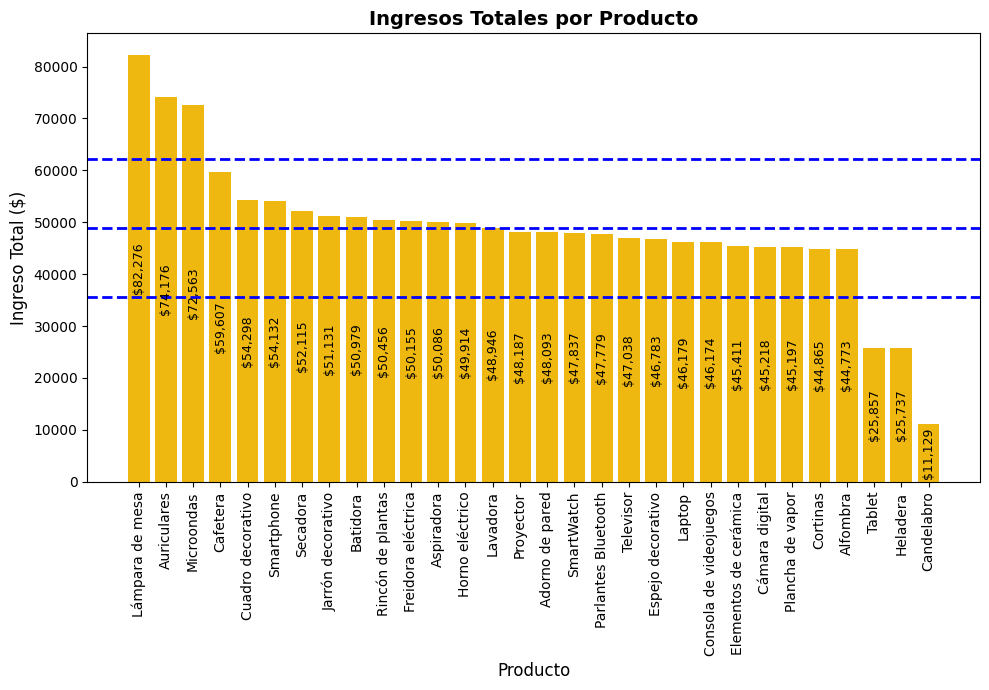

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
micolor = "#efb810"
barras = plt.bar(productos_dfAO["producto"], productos_dfAO["valor"], color=micolor)
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y
plt.xticks(rotation=90)
for barra in barras:
    y = barra.get_height()

    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="black",                          # texto negro
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )
plt.tight_layout()
des1 = valor_promedio - valor_desstd
des2 = valor_promedio + valor_desstd
plt.axhline(valor_promedio, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {valor_promedio:.2f}')
plt.axhline(des1, color='blue', linestyle='--', linewidth=2, label=f'Q1: {des1:.2f}')
plt.axhline(des2, color='blue', linestyle='--', linewidth=2, label=f'Q3: {des2:.2f}')
plt.show()

**Informe sobre valor total de las ventas por producto**

  Como podemos ver en la tabla con los estadisticos calculados sobre la cantidad total de productos vendidos, el precio maximo de cada producto y el valor total vendido por producto y en el gráfico donde muestro el promedio y el rango intermedio de dos desviaciones estandar, el rendimiento de los productos es vastante constante en el rango del desvio estandar, destacando solo tres con un rendimiento superior y tres con rendimientos inferiores. Lo que complementa lo realizado en el punto 2-Transformación de Datos que nos muestra que 6 productos suman el 20% de las ventas totales.
  

2- Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

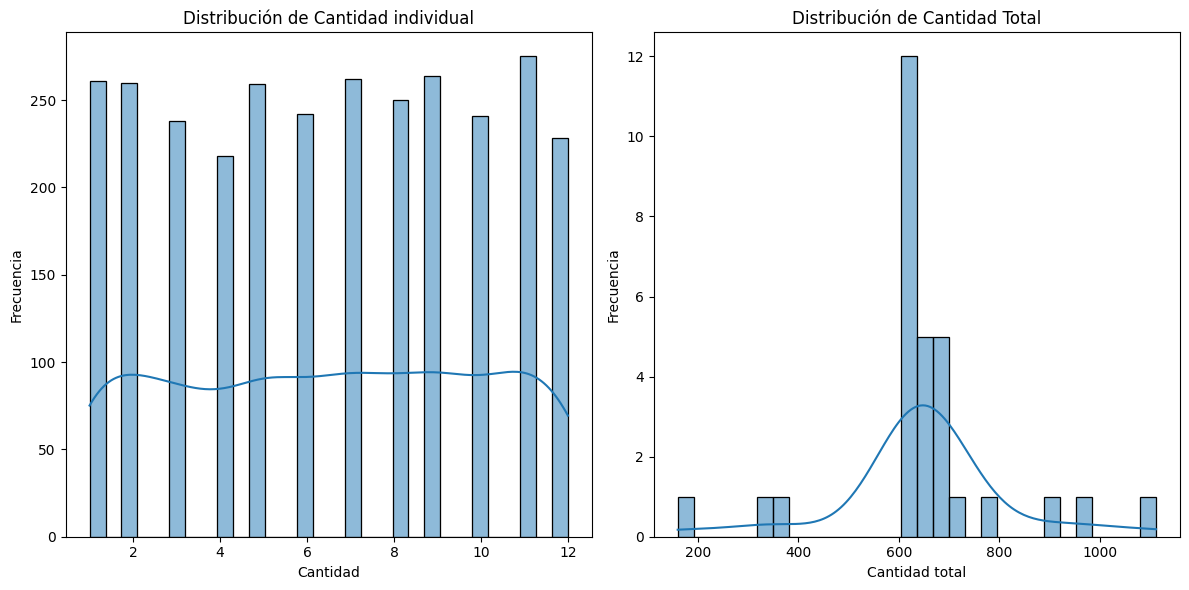

In [21]:
# Visualizar la distribución de las cantidades individuales vendidas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_ventasL['cantidad'], bins=30, kde=True)
plt.title('Distribución de Cantidad individual')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
# Visualizar la distribución de las cantidades totales
plt.subplot(1, 2, 2)
sns.histplot(productos_dfA['cantidad'], bins=30, kde=True)
plt.title('Distribución de Cantidad Total')
plt.xlabel('Cantidad total')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

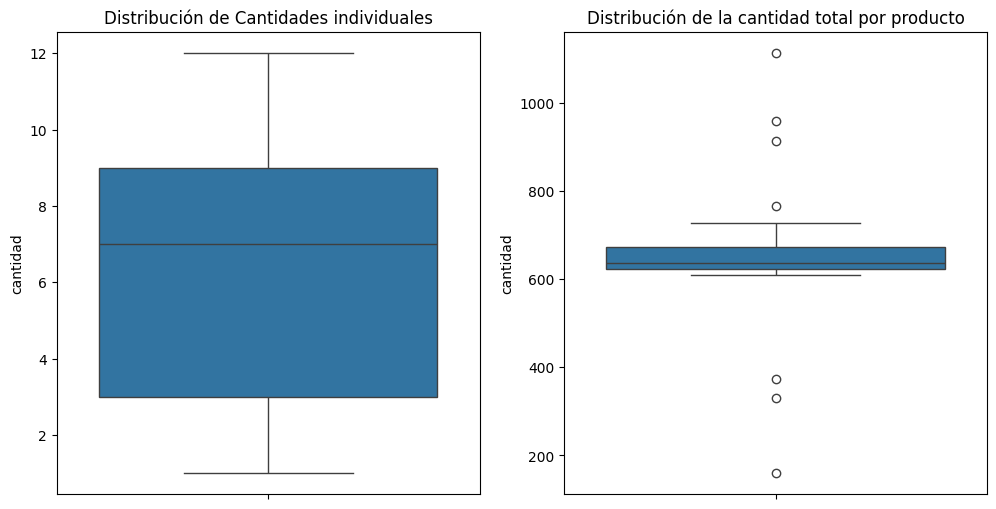

In [22]:
# Visualizar la distribución de las cantidades
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df_ventasL['cantidad'])
plt.title('Distribución de Cantidades individuales')
plt.subplot(1, 2, 2)
sns.boxplot(productos_dfA['cantidad'])
plt.title('Distribución de la cantidad total por producto')
plt.show()

3- Correlación: Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.

In [23]:
correcp = productos_dfA['cantidad'].corr(productos_dfA['precio'])
correcv = productos_dfA['cantidad'].corr(productos_dfA['valor'])
print("Correlación")
print(f"Cantidad/Precio: {correcp=:.2f} - Cantidad/Total: {correcv=:.2f}")

Correlación
Cantidad/Precio: correcp=0.24 - Cantidad/Total: correcv=0.99


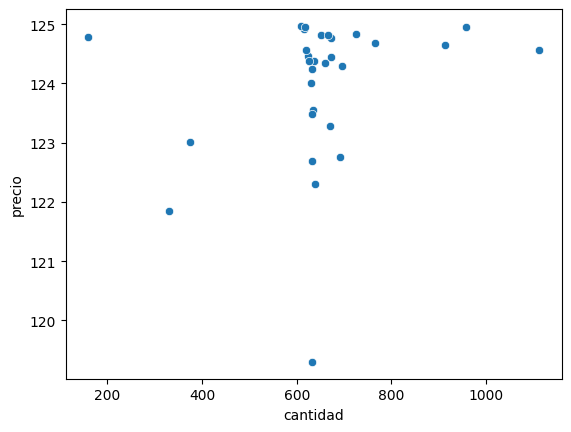

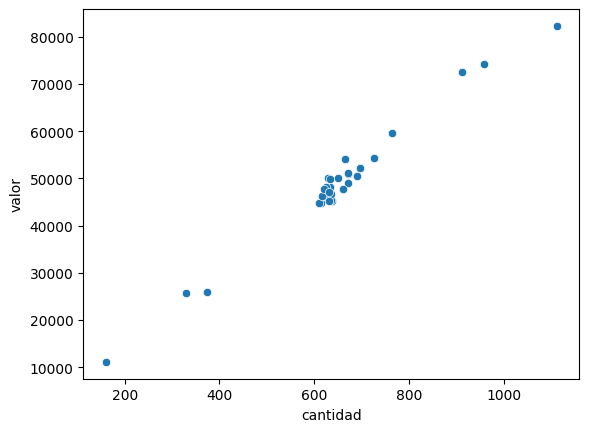

In [24]:
sns.scatterplot(x='cantidad', y='precio', data=productos_dfA)
plt.show()
sns.scatterplot(x='cantidad', y='valor', data=productos_dfA)
plt.show()

4- Consolidación de Datos: Consolidar todos los análisis previos y preparar un conjunto de datos final que resuma los hallazgos clave para la presentación.

Para estos puntos utilice dos dataframe generados con anterioridad, df_ventasL que contiene las ventas individuales sin agrupar y productos_dfA que contiene la agrupación por producto, sumando las cantidades vendidas de cada producto.
Lo que podemos ver aquí con claridad es que las ventas individuales son de cantidades entre 1 y 12, es decir que en todos los casos son ventas minoristas con lo cual la diferencia en las cantidades totales vendidas por producto tiene que ver con la cantidad de ventas individuales de cada uno. Este analisis puede implicar desiciones de marketing, de efectuar ofertas por cantidad o de pensar en canales mayoristas.
En el caso del analisis de correlación utilice el dataset agrupado por productos considerando la suma de cantidades y valores y solo el precio maximo. Como se puede ver hay una correlación fuerte entre la cantidad total y el valor total, mientras que no la hay entre la cantidad y el precio.

**Etapa 4: Visualización de Datos**
1- Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión) que representen las ventas con diferentes periodos de tiempo.


In [25]:
import datetime as dt
df_ventasL1 = df_ventasL.assign(
    valor=df_ventasL['cantidad'] * df_ventasL['precio'],
    mes=df_ventasL['fecha_venta'].dt.month
)
df_ventasL1.head(5)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor,mes
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.70,1
1,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.50,1
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos,293.88,1
3,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos,914.80,1
4,1546,Secadora,106.21,4.0,2024-01-02,Electrodomésticos,424.84,1


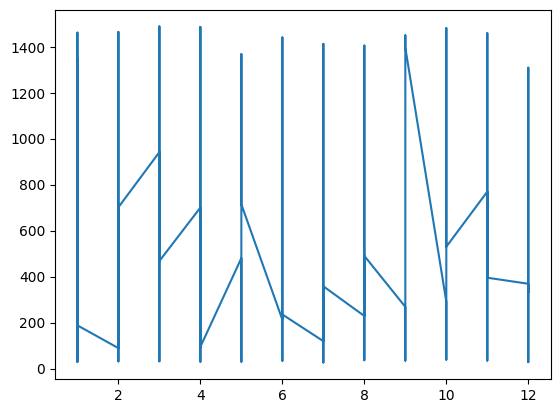

In [26]:
#Lineas
plt.plot(df_ventasL1['mes'], df_ventasL1['valor'])
plt.show()

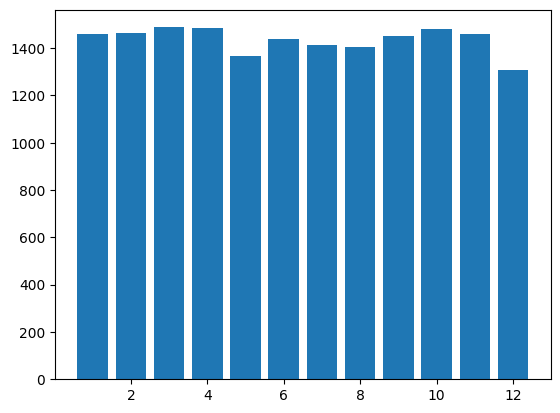

In [27]:
#barras
plt.bar(df_ventasL1['mes'], df_ventasL1['valor'])
plt.show()

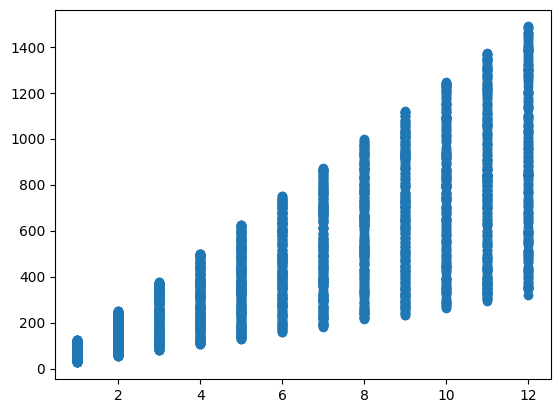

In [28]:
#disperción
plt.scatter(df_ventasL1['cantidad'], df_ventasL1['valor'])
plt.show()

2- Visualización Avanzada con Seaborn: Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.

<Axes: xlabel='categoria', ylabel='cantidad'>

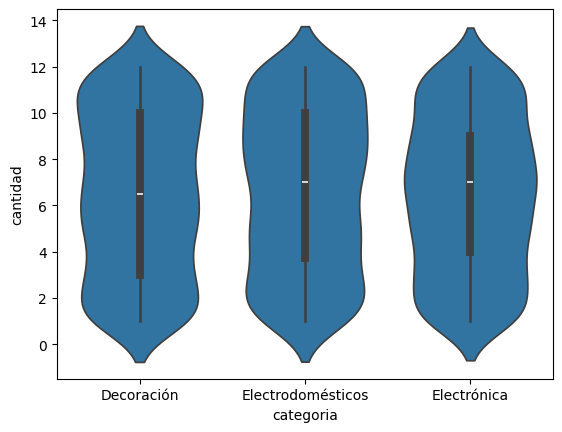

In [29]:
sns.violinplot(data = df_ventasL1, x='categoria', y='cantidad')

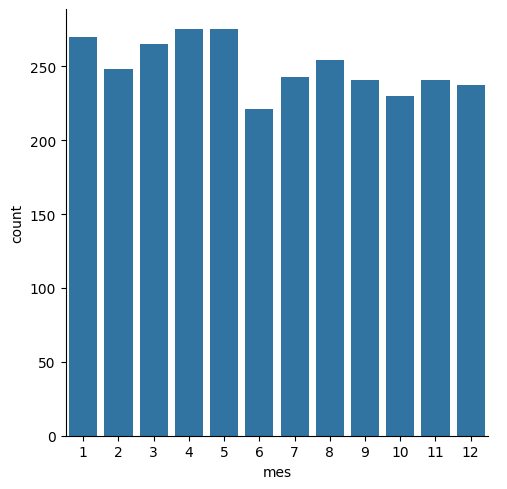

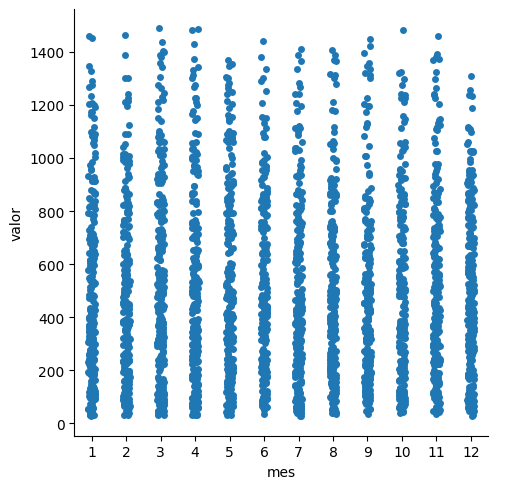

In [30]:
g = sns.catplot(x="mes",
                kind ="count",
                data=df_ventasL1)
g = sns.catplot(x="mes", y="valor",
                data=df_ventasL1)

3- Visualización Interactiva con Plotly: Construir un dashboard interactivo que combine múltiples visualizaciones, permitiendo al usuario explorar los datos dinámicamente.


4- Presentación Final: Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto. Presentar ante un panel simulado de "expertos" en SynthData, recibiendo feedback sobre el trabajo realizado.